In [20]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [21]:
# data processing

# read h5 file and transform to ndarray
train = h5py.File('datasets/train_catvnoncat.h5', "r")
train_x = np.array(train["train_set_x"])/255
train_y = np.array(train["train_set_y"])

test = h5py.File('datasets/test_catvnoncat.h5', "r")
test_x = np.array(test["test_set_x"])/255
test_y = np.array(test["test_set_y"])

# classes
classes = np.array(test["list_classes"])

# reshape data
train_x = train_x.reshape(train_x.shape[0], -1).T
train_y = train_y.reshape(1, train_y.shape[0])

test_x = test_x.reshape(test_x.shape[0], -1).T
test_y = test_y.reshape(1, test_y.shape[0])

In [41]:
class net:
    def __init__(self, layer_dims, m):
        self.depth = len(layer_dims)-1
        self.layer_dims = layer_dims
        self.W = []
        self.B= []
        self.A = []
        for i in range(self.depth):
            w = 0.01 * np.random.randn(layer_dims[i+1], layer_dims[i])
            self.W.append(w)
        for i in range(self.depth):
            b = np.zeros((layer_dims[i+1], 1))
            self.B.append(b)
        for i in range(len(self.layer_dims)):
            a = np.zeros((self.layer_dims[i], m))
            self.A.append(a)
            
    def train(self, X, Y, alpha, epochs):
        costs = []
        for _ in range(epochs):
            self.feedforward(X)
            self.backpropogate(Y, alpha)
            loss = -(np.log(self.A[-1]) @ Y.T + np.log(1-self.A[-1]) @ (1-Y).T) / Y.shape[1]
            loss = np.squeeze(loss)
            costs.append(loss)
            if (_+1) % 100 == 0:
                print(f"loss after {_+1} epochs: {loss}")
        return costs
                
    def feedforward(self, X):
        assert(self.A[0].shape[0] == X.shape[0])
        self.A[0] = X
        for i in range(1, self.depth):
            self.A[i] = self.ReLU(self.W[i-1] @ self.A[i-1] + self.B[i-1])
        self.A[-1] = self.sigmoid(self.W[-1] @ self.A[-2] + self.B[-1])
            
    def backpropogate(self, Y, alpha):
        assert(self.A[-1].shape[0] == Y.shape[0])
        m = Y.shape[1]
        dZ = self.sigmoidback(1, Y, self.A[-1])
        dW = dZ @ self.A[-2].T / m
        dB = np.sum(dZ) / m
        self.W[-1] -= alpha * dW
        self.B[-1] -= alpha * dB
        if self.depth > 1:
            for i in range(self.depth-1, 0, -1):
                dZ = self.ReLUback(self.W[i], dZ, self.A[i])
                dW = dZ @ self.A[i-1].T / m
                dB = np.sum(dZ) / m
                self.W[i-1] -= alpha * dW
                self.B[i-1] -= alpha * dB
                
    def predict(self, X):
        a = X.copy()
        for i in range(self.depth-1):
            a = ReLU(self.W[i] @ a + self.B[i])
        a = sigmoid(self.W[i+1] @ a + self.B[i+1])
        a[a>=0.5] = 1
        a[a <0.5] = 0
        return a
    
    @staticmethod
    def sigmoid(z):
        a = 1/(1+np.exp(-z))
        return a
    
    @staticmethod
    def ReLU(z):
        a = np.maximum(0, z)
        return a
    
    @staticmethod
    def sigmoidback(w, dZ, a):
        if w is np.ndarray:
            return np.multiply(w.T @ dZ, (1-a)*a)
        else:
            return a - dZ
    
    @staticmethod
    def ReLUback(w, dZ, a):
        return np.multiply(w.T @ dZ, (a != 0).astype(np.int))

In [74]:
np.random.seed(1)

nn = net([train_x.shape[0], 7, 1], train_x.shape[1])

In [75]:
costs = nn.train(train_x, train_y, alpha=0.008, epochs=2500)

loss after 100 epochs: 0.6458112522006728
loss after 200 epochs: 0.6296483211624426
loss after 300 epochs: 0.5937285573412058
loss after 400 epochs: 0.5486451356537572
loss after 500 epochs: 0.5013317079781118
loss after 600 epochs: 0.4605900684620182
loss after 700 epochs: 0.4061969287707952
loss after 800 epochs: 0.38993461281518393
loss after 900 epochs: 0.36113523626361776
loss after 1000 epochs: 0.3508802644521435
loss after 1100 epochs: 0.27237725471539054
loss after 1200 epochs: 0.3225300710155756
loss after 1300 epochs: 0.291180298856663
loss after 1400 epochs: 0.3811781491060155
loss after 1500 epochs: 0.1773811224886809
loss after 1600 epochs: 0.11297651057487065
loss after 1700 epochs: 0.09758123573041079
loss after 1800 epochs: 0.08367167461548308
loss after 1900 epochs: 0.07008948633660805
loss after 2000 epochs: 0.06073281921905411
loss after 2100 epochs: 0.053361036960909214
loss after 2200 epochs: 0.04731886958934366
loss after 2300 epochs: 0.04088940408453362
loss afte

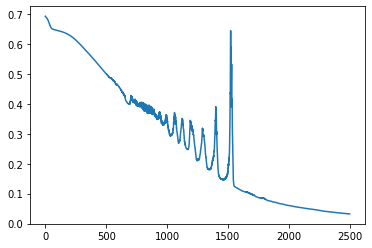

In [76]:
import matplotlib.pyplot as plt

plt.plot(costs)

In [77]:
def predict(net, X):
    a = X.copy()
    for i in range(net.depth-1):
        a = net.ReLU(net.W[i] @ a + net.B[i])
    a = net.sigmoid(net.W[i+1] @ a + net.B[i+1])
    a[a>=0.5] = 1
    a[a< 0.5] = 0
    return a

In [78]:
pre = predict(nn, train_x)
accuracy = np.sum(pre==train_y)/len(pre[0])
print(accuracy)

0.9952153110047847


In [79]:
pre = predict(nn, test_x)
accuracy = np.sum(pre==test_y)/len(pre[0])
print(accuracy)

0.72
